<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Lecture_code/Lec10-RandomForest.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Random forest
---

This is the lecture note for **random forest**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to random forest. I encourage you to read further about random forests. </p>

Read more:

- [RandomForestRegressor - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [RandomForestClassifier - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Tune hyperparameters - towardsdatascience](https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d)
- [Random forest - wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [Lecture slides chapter 8 - ISLR](https://hastie.su.domains/ISLR2/Slides/Ch8_Tree_Based_Methods.pdf)
- [ISLRv2 pp. 327-352](https://www.statlearning.com/)
---


## Bagging 
- In general for independent observations $Z_1, \ldots, Z_n$ with variance $\sigma^2$ each. Mean of the observations is $\bar{Z} = \frac{\sigma^2}{n}$. So by averaging set of observation we reduce the variance.
- we do this by bagging - bootstrap aggregation. We sample multiple times from a training set and average over all the predictions.
- For classification trees we use the majority vote among all the predictions by the bootstrapped trees

## Random forest
- grow many decision trees on bootstrapped samples
- randomly choose $m \approx \sqrt{p}$ predictors/features as split candidates
- choose one of these $m$ features for the split
- new $m$ features are chosen for each split

In [16]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use("seaborn-white")

df = pd.read_csv("../data/Heart.csv", index_col = 0)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


<AxesSubplot:xlabel='AHD', ylabel='count'>

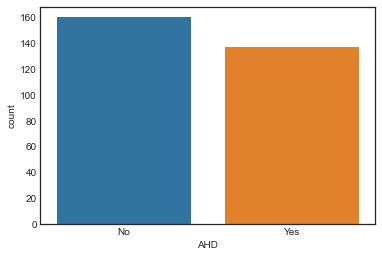

In [20]:
df.dropna(inplace=True)

sns.countplot(data = df, x = "AHD")

In [21]:
df_dummies = pd.get_dummies(df, drop_first=True)
X, y = df_dummies.drop("AHD_Yes", axis=1), df_dummies["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [22]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=uint8)

In [ ]:
from sklearn.model_selection import GridSearchCV
# parameter optimering
# Giny entropy dvs olika metoder vi vill testa
# scoring="recall" optimerar för detta
# verbose dvs skriver ut 
param_grid = {"n_estimators": [100, 150, 200,
                               300], "criterion": ["gini", "entropy"], "max_features": ["auto","sqrt", "log2"]}
clf = GridSearchCV(RandomForestClassifier(), param_grid,
                   cv=5, verbose=1, scoring="recall")
clf.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [ ]:
# det är detta den tycker är bäst
clf.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 200}

## Evaluation
- default
- hyperparameters tuned

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



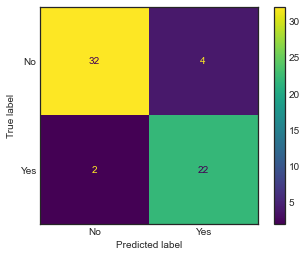

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_classification(y_test, y_pred, labels = ["No", "Yes"]):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=labels).plot()

evaluate_classification(y_test, y_pred)
# Nu kan vi använda denna funktion för att testa med och 
# utan optimering
# här testar vid utan optimering

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



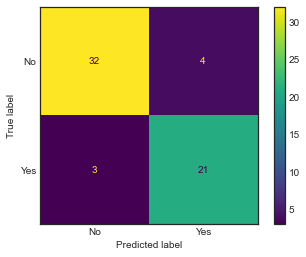

In [ ]:
y_pred_tuned = clf.predict(X_test)
evaluate_classification(y_test, y_pred_tuned)
# här testar vi med optimering
# i det här fallet får vi samma resultat
# men vi kommer får olika reultat varje gång 
# vi tränar algoritmen 

In [69]:
model_rf.feature_importances_, model_rf.feature_importances_.sum()

(array([0.08839598, 0.03404896, 0.08362822, 0.09486928, 0.01300379,
        0.02115667, 0.12223509, 0.05525256, 0.11696637, 0.03096116,
        0.14055381, 0.03680003, 0.00910466, 0.01581684, 0.07399679,
        0.06320981]),
 0.9999999999999999)

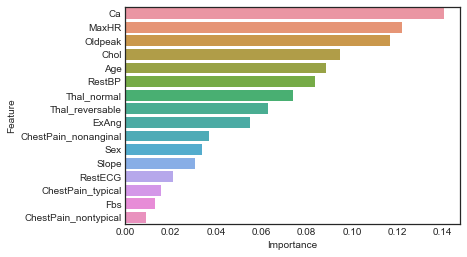

In [70]:
feature_importance = pd.DataFrame([X.columns, model_rf.feature_importances_]).T
feature_importance.columns = ["Feature", "Importance"]
feature_importance.sort_values(by = "Importance", ascending = False, inplace = True)
sns.barplot(data = feature_importance, x = "Importance", y = "Feature");

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---


### Repeat

In [ ]:
# Heart Attack Statistics
import pandas as pd
df = pd.read_csv("../data/Heart.csv", index_col = 0)

# We have a couple of nan so lets remove them
## df.info()
## df.dropna(inplace=True)


# Lets check if the target(y) is balanced
import seaborn as sns
#sns.countplot(data = df, x = "AHD")


# Before we split we will covert categorical variables in to binary
# be ware that if the categorical vaiable contains 5 different classes
# then you'll get 5 different columns unless you chose drop_first, then
# you'll get four, the logic being that if all of them are false then 
# the it must belong to the fifth category
#
# Because we are delaing with a tree we don't really care 
# about the number of features so getting a bunch of extra
# ones doesn't matter and technically we don't get more 
# features we just unpack them
df_dummies = pd.get_dummies(df, drop_first=True)
#print( df_dummies.head(2) )
#print( df.head(2))


# Train Test Splitt
from sklearn.model_selection import train_test_split
X, y = df_dummies.drop("AHD_Yes", axis=1), df_dummies["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



# Train using random forest without any 
# hyperparameter optimization
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_pred

In [ ]:
# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [100, 150, 200,
                               300], "criterion": ["gini", "entropy"], "max_features": ["auto","sqrt", "log2"]}
clf = GridSearchCV(RandomForestClassifier(), param_grid,
                   cv=5, verbose=1, scoring="recall")
clf.fit(X_train, y_train)
# check results
clf.best_params_

              precision    recall  f1-score   support

       False       0.82      0.97      0.89        29
        True       0.96      0.81      0.88        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61

              precision    recall  f1-score   support

       False       0.84      0.93      0.89        29
        True       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



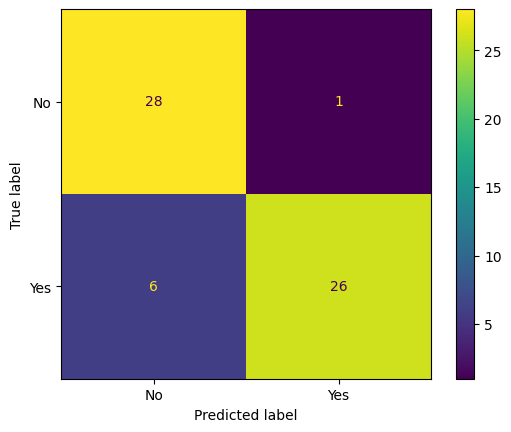

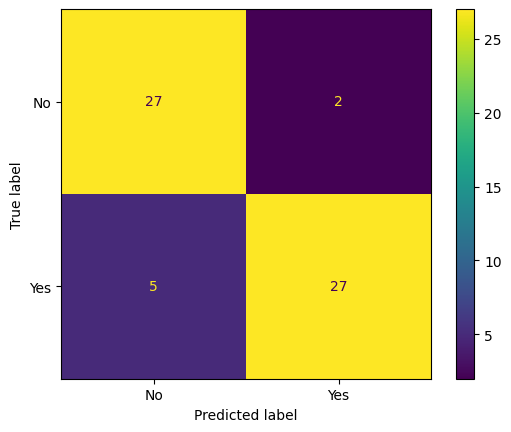

In [16]:
# Evaluation 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_classification(y_test, y_pred, labels = ["No", "Yes"]):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=labels).plot()

# Without opimization
evaluate_classification(y_test, y_pred)

# With optimizataion
y_pred_tuned = clf.predict(X_test)
evaluate_classification(y_test, y_pred_tuned)

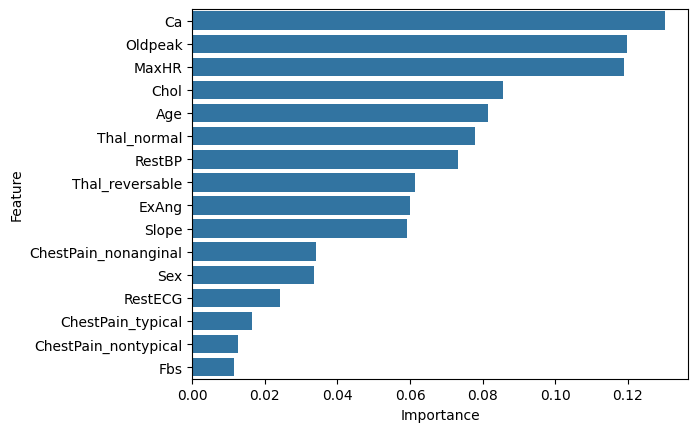

In [17]:
# Check the importance of each feature?
feature_importance =pd.DataFrame([X.columns, model_rf.feature_importances_]).T
feature_importance.columns = ["Feature", "Importance"]
feature_importance.sort_values(by = "Importance", ascending = False, inplace = True)
sns.barplot(data = feature_importance, x = "Importance", y = "Feature");